In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/apart/Apart Deal.csv'

data = pd.read_csv(url)

data.head(10)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
5,31110,남외동,1/7/2020 0:00,에일린의뜰,500,114.7345,2,2007,41000
6,31110,남외동,1/8/2020 0:00,에일린의뜰,500,84.9920,5,2007,34000
7,31110,남외동,1/9/2020 0:00,백합,447-5,65.7200,5,1985,8000
8,31110,남외동,1/11/2020 0:00,에일린의뜰,500,114.7345,10,2007,44300
9,31110,남외동,1/18/2020 0:00,남외푸르지오1차,506-1,84.7820,9,2006,36000


In [4]:
data.지역코드.value_counts()

41590    100716
41360     79983
41190     74547
41570     61457
41465     60237
          ...  
45740       248
47720       240
47760       122
47940        28
46910         3
Name: 지역코드, Length: 249, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315703 entries, 0 to 4315702
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    int64  
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int64  
 8   거래금액    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 296.3+ MB


In [6]:
data = data.rename({'지역코드':'Area code',
                    '법정동':'Dong', '거래일':'Trading day', 
                    '아파트':'Apartment', '지번':'Lot number', 
                    '전용면적':'Exclusive area', '층':'Floor', 
                    '건축년도':'Year of construction', '거래금액':'Transaction amount'}, axis='columns')
data.head(3)

,Area code,Dong,Trading day,Apartment,Lot number,Exclusive area,Floor,Year of construction,Transaction amount
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.580,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.600,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.992,11,2007,36500


In [7]:
data = data.astype({'Area code':'int',
                          'Dong':'category',
                          'Trading day':'datetime64',
                          'Apartment':'category',
                          'Exclusive area':'float',
                          'Floor':'category',
                          'Year of construction':'int',
                          'Transaction amount':'int'})
data.dtypes

Area code                        int64
Dong                          category
Trading day             datetime64[ns]
Apartment                     category
Lot number                      object
Exclusive area                 float64
Floor                         category
Year of construction             int64
Transaction amount               int64
dtype: object

In [8]:
data.head()

,Area code,Dong,Trading day,Apartment,Lot number,Exclusive area,Floor,Year of construction,Transaction amount
0,31110,학성동,2020-05-30,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,2020-01-03,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,2020-01-03,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,2020-01-03,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,2020-01-04,남외푸르지오2차,501-1,84.9636,7,2007,38700


In [9]:
data.describe()

,Area code,Exclusive area,Year of construction,Transaction amount
count,4.315703e+06,4.315703e+06,4.315703e+06,4.315703e+06
mean,3.549689e+04,7.605603e+01,2.001340e+03,3.020880e+04
std,1.147806e+04,2.624946e+01,9.247246e+00,2.605684e+04
min,1.111000e+04,9.260000e+00,1.961000e+03,1.000000e+02
25%,2.818500e+04,5.974880e+01,1.995000e+03,1.500000e+04
50%,4.127300e+04,7.958700e+01,2.001000e+03,2.400000e+04
75%,4.311400e+04,8.496000e+01,2.008000e+03,3.700000e+04
max,5.013000e+04,4.243200e+02,2.021000e+03,8.400000e+05


In [10]:
data[data['Area code']==11740]

,Area code,Dong,Trading day,Apartment,Lot number,Exclusive area,Floor,Year of construction,Transaction amount
732700,11740,강일동,2018-01-05,강일리버파크5단지,670,84.83,3,2009,57500
732701,11740,강일동,2018-01-06,강일리버파크4단지,673,84.74,9,2009,59000
732702,11740,강일동,2018-01-06,고덕리엔파크2단지,717,59.83,11,2011,55000
732703,11740,강일동,2018-01-06,고덕리엔파크2단지,717,84.98,13,2011,65000
732704,11740,강일동,2018-01-07,강일리버파크4단지,673,84.53,6,2009,60000
...,...,...,...,...,...,...,...,...,...
4288648,11740,천호동,2021-03-20,대우한강베네시티,425-5,130.13,15,2007,121000
4288649,11740,천호동,2021-03-25,성인아파트,32-2,80.12,2,2002,33000
4288650,11740,천호동,2021-03-25,두산위브센티움,414,39.17,5,2004,18500
4288651,11740,천호동,2021-03-31,미사 아름채 아파트,452-15,12.14,7,2020,23000


In [11]:
dong = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apart/법정동코드 전체자료.txt',sep='\t')

In [12]:
dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46292 entries, 0 to 46291
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동코드   46292 non-null  int64 
 1   법정동명    46292 non-null  object
 2   폐지여부    46292 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [13]:
dong.astype(str)

,법정동코드,법정동명,폐지여부
0,1100000000,서울특별시,존재
1,1111000000,서울특별시 종로구,존재
2,1111010100,서울특별시 종로구 청운동,존재
3,1111010200,서울특별시 종로구 신교동,존재
4,1111010300,서울특별시 종로구 궁정동,존재
...,...,...,...
46287,5013032022,제주특별자치도 서귀포시 표선면 하천리,존재
46288,5013032023,제주특별자치도 서귀포시 표선면 성읍리,존재
46289,5013032024,제주특별자치도 서귀포시 표선면 가시리,존재
46290,5013032025,제주특별자치도 서귀포시 표선면 세화리,존재


In [14]:
seoul = data[(data['Area code']<=11740)&(data['Area code']>=11110)]

In [15]:
seoul.to_csv('seoul.csv')

In [16]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557061 entries, 655312 to 4288652
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Area code             557061 non-null  int64         
 1   Dong                  557061 non-null  category      
 2   Trading day           557061 non-null  datetime64[ns]
 3   Apartment             557061 non-null  category      
 4   Lot number            556845 non-null  object        
 5   Exclusive area        557061 non-null  float64       
 6   Floor                 557061 non-null  category      
 7   Year of construction  557061 non-null  int64         
 8   Transaction amount    557061 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 34.6+ MB


In [17]:
ci_gu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apart/ci_gu.csv')

In [18]:
ci_gu.head()

,Unnamed: 0,code,dong,YN
0,1,11110,종로구,존재
1,2,11110,종로구,존재
2,3,11110,종로구,존재
3,4,11110,종로구,존재
4,5,11110,종로구,존재


In [19]:
ci_gu.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
ci_gu.drop('YN',axis=1,inplace=True)

In [21]:
ci_gu.groupby(['code','dong'])
ci_gu

,code,dong
0,11110,종로구
1,11110,종로구
2,11110,종로구
3,11110,종로구
4,11110,종로구
...,...,...
46264,50130,서귀포시
46265,50130,서귀포시
46266,50130,서귀포시
46267,50130,서귀포시


In [22]:
ci_gu=ci_gu.drop_duplicates()

In [23]:
ci_gu=ci_gu.rename({'code':'Area code','dong':'Gu'}, axis='columns')

In [24]:
ci_gu.head()

,Area code,Gu
0,11110,종로구
93,11140,중구
178,11170,용산구
228,11200,성동구
331,11215,광진구


In [25]:
df = pd.merge(data,ci_gu,on='Area code',how='left')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341031 entries, 0 to 5341030
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Area code             int64         
 1   Dong                  category      
 2   Trading day           datetime64[ns]
 3   Apartment             category      
 4   Lot number            object        
 5   Exclusive area        float64       
 6   Floor                 category      
 7   Year of construction  int64         
 8   Transaction amount    int64         
 9   Gu                    object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 358.2+ MB


In [27]:
df=df[['Area code','Gu','Dong','Lot number','Trading day','Apartment','Exclusive area','Floor','Year of construction','Transaction amount']]

In [28]:
df

,Area code,Gu,Dong,Lot number,Trading day,Apartment,Exclusive area,Floor,Year of construction,Transaction amount
0,31110,중구,학성동,379,2020-05-30,남운학성타운,135.5800,8,1991,26700
1,31110,중구,남외동,506-1,2020-01-03,남외푸르지오1차,101.6000,2,2006,35500
2,31110,중구,남외동,500,2020-01-03,에일린의뜰,84.9920,11,2007,36500
3,31110,중구,남외동,506-1,2020-01-03,남외푸르지오1차,118.7060,8,2006,43000
4,31110,중구,남외동,501-1,2020-01-04,남외푸르지오2차,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...,...,...
5341026,50110,제주시,애월읍 하귀1리,166-1,2021-04-07,제주하귀휴먼시아2단지,84.8400,7,2010,38500
5341027,50110,제주시,한림읍 한림리,1530-2,2021-04-06,영신,84.8700,4,1991,12000
5341028,50130,서귀포시,동홍동,2196,2021-03-26,동호아트리움,74.9261,3,2019,32500
5341029,50130,서귀포시,동홍동,157,2021-03-29,동홍동코아루,60.9375,3,2013,24100


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341031 entries, 0 to 5341030
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Area code             int64         
 1   Gu                    object        
 2   Dong                  category      
 3   Lot number            object        
 4   Trading day           datetime64[ns]
 5   Apartment             category      
 6   Exclusive area        float64       
 7   Floor                 category      
 8   Year of construction  int64         
 9   Transaction amount    int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 358.2+ MB


In [30]:
seoul = df[df['Area code']==11110]

In [31]:
from fbprophet import Prophet

In [32]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [33]:
target = seoul[['Trading day','Transaction amount']]

In [34]:
target.rename({'Trading day':'ds','Transaction amount':'y'},axis='columns',inplace=True)

In [35]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4365 entries, 964912 to 5304311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4365 non-null   datetime64[ns]
 1   y       4365 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 102.3 KB


In [36]:
target.groupby('ds').mean()

,y
ds,
2015-01-02,38900.0
2015-01-03,14000.0
2015-01-06,45625.0
2015-01-07,71000.0
2015-01-08,45020.0
...,...
2021-03-24,25000.0
2021-03-25,51500.0
2021-03-26,86500.0


In [37]:
prophet.fit(target)

In [38]:
future_data = prophet.make_future_dataframe(periods=60, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1721,2021-05-27,87686.595859,43227.404555,133400.429815
1722,2021-05-28,85959.377234,41906.927655,133036.044369
1723,2021-05-29,86747.006637,42341.988796,130959.302710
1724,2021-05-30,83798.750056,40572.105692,130679.699771
1725,2021-05-31,86586.895895,40402.941911,136922.819211


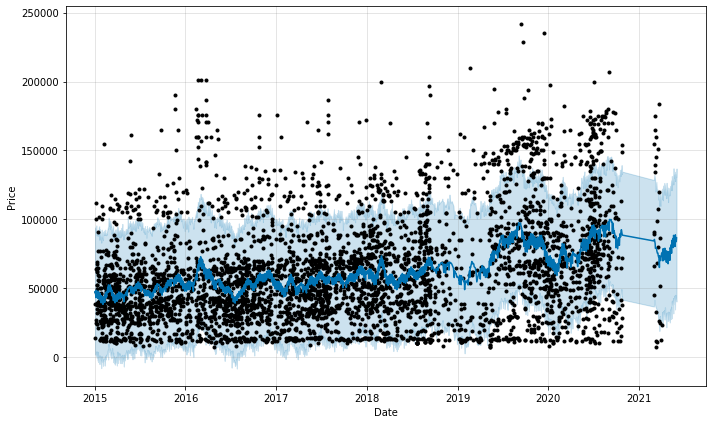

In [39]:
fig1 = prophet.plot(forecast_data,xlabel='Date',ylabel='Price')

In [41]:
import numpy as np
target['y']=np.log(target['y'])

In [42]:
target

,ds,y
964912,2018-01-13,11.775290
964913,2018-01-19,11.472103
964914,2018-01-23,11.678440
964915,2018-01-30,10.905956
964916,2018-01-31,11.066638
...,...,...
5304307,2021-03-25,10.849337
5304308,2021-03-11,8.922658
5304309,2021-03-07,12.072541
5304310,2021-03-11,11.982929


In [44]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [45]:
prophet.fit(target)

In [46]:
future_data = prophet.make_future_dataframe(periods=60, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1721,2021-05-27,11.172318,10.387309,12.107486
1722,2021-05-28,11.156051,10.362800,11.991747
1723,2021-05-29,11.199103,10.364421,11.980511
1724,2021-05-30,11.226070,10.354523,12.087559
1725,2021-05-31,11.177482,10.329098,12.027120


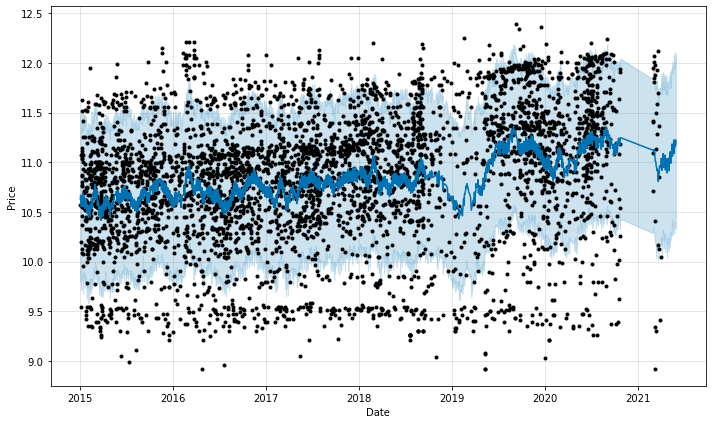

In [47]:
fig1 = prophet.plot(forecast_data,xlabel='Date',ylabel='Price')